### purpose

visualize correlation among environmental variables

In [1]:
from pythonimports import *
from myfigs import save_pdf

import MVP_01_train_gradient_forests as mvp01
import MVP_05_train_RONA as mvp05
import MVP_10_train_lfmm2_offset as mvp10
import MVP_summary_functions as mvp

import seaborn as sns
plt.rcParams.update({'font.family' : 'serif'})

summarydir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries'
figdir = makedir(f'{summarydir}/07_experiments/02_nuisance_envs/11_env_correlations/figs')

mvp.latest_commit()
session_info.show()

#########################################################
Today:	August 19, 2023 - 13:12:32 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 9493334506a1f2926fba0734fa74ba2f87194611  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 30 09:41:00 2023 -0400

Current commit of MVP_offsets:
commit dcaf4a98ad33a59e3d371eed0bb26b1885505dcf  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Sat Jun 24 12:25:29 2023 -0400
#########################################################



# map landscape to seed

In [2]:
params = mvp10.read_params_file('/home/b.lind/offsets/run_20220919_0-225/slimdir')

params.head()

,level,reps,arch,demog_name,demog_level_sub,demog_level,MIG_x,MIG_y,xcline,ycline,demog,METAPOP_SIDE_x,METAPOP_SIDE_y,Nequal,isVariableM,MIG_breaks,arch_level_sub,arch_level,MU_base,MU_QTL_proportion,SIGMA_QTN_1,SIGMA_QTN_2,SIGMA_K_1,SIGMA_K_2,N_traits,ispleiotropy,seed
1231094,highly-polygenic_1-trait__Est-Clines_N-cline-c...,1,highly-polygenic_1-trait,Est-Clines_N-cline-center-to-edge_m-constant,N-cline-center-to-edge_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,4,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231094
1231095,highly-polygenic_1-trait__Est-Clines_N-cline-N...,1,highly-polygenic_1-trait,Est-Clines_N-cline-N-to-S_m-constant,N-cline-N-to-S_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,2,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231095
1231096,highly-polygenic_1-trait__Est-Clines_N-equal_m...,1,highly-polygenic_1-trait,Est-Clines_N-equal_m_breaks,N-equal_m_breaks,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,0,0,1,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231096
1231097,highly-polygenic_1-trait__Est-Clines_N-equal_m...,1,highly-polygenic_1-trait,Est-Clines_N-equal_m-constant,N-equal_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,0,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231097
1231098,highly-polygenic_1-trait__Est-Clines_N-variabl...,1,highly-polygenic_1-trait,Est-Clines_N-variable_m-variable,N-variable_m-variable,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,3,1,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231098


In [3]:
landscape_seeds = params.groupby('demog_level')['seed'].apply(list).to_dict()

landscape_seeds['Est-Clines'][:5]

[1231094, 1231095, 1231096, 1231097, 1231098]

# get 6-trait env data

In [4]:
training_dir = '/home/b.lind/offsets/run_20220919_tutorial/gradient_forests/training/training_files'
f = f'{training_dir}/tutorial_envfile_GFready_pooled.txt'

multivariate = pd.read_table(f, index_col=0)

multivariate.columns = [col.split("_")[-1] for col in multivariate.columns]

multivariate

,mat,MTWetQ,MTDQ,PDM,PwarmQ,PWM
1,0.186225,-0.226935,0.861531,0.221974,-0.363974,0.761569
2,0.070353,-0.265649,0.799727,0.169512,-0.417965,0.315295
3,0.264633,-0.248372,0.375248,-0.172690,-0.586408,-0.320803
4,0.371616,0.167485,0.063118,-0.465978,-0.656053,-0.625240
5,0.244613,0.117437,-0.010939,-0.291486,-0.528748,-0.537376
...,...,...,...,...,...,...
96,-0.288220,0.261489,-0.317123,-0.018548,0.228030,-0.045559
97,-0.116570,0.323553,-0.231351,-0.269762,0.344912,0.059459
98,0.093915,0.400397,-0.150975,-0.408936,0.588880,0.274592
99,0.034177,0.399089,-0.440848,-0.464035,0.673533,0.360201


# get nuisance envdata

In [5]:
fs('/home/b.lind/offsets/run_20220919_tutorial/tutorial', startswith='nuisance')

['/home/b.lind/offsets/run_20220919_tutorial/tutorial/nuisance_ISO-PSsd_vals.txt',
 '/home/b.lind/offsets/run_20220919_tutorial/tutorial/nuisance_ISO-TSsd-PSsd_vals.txt',
 '/home/b.lind/offsets/run_20220919_tutorial/tutorial/nuisance_ISO-TSsd_vals.txt',
 '/home/b.lind/offsets/run_20220919_tutorial/tutorial/nuisance_ISO_vals.txt',
 '/home/b.lind/offsets/run_20220919_tutorial/tutorial/nuisance_PSsd_vals.txt',
 '/home/b.lind/offsets/run_20220919_tutorial/tutorial/nuisance_TSsd-PSsd_vals.txt',
 '/home/b.lind/offsets/run_20220919_tutorial/tutorial/nuisance_TSsd_vals.txt']

In [6]:
nuis_data = pd.read_table('/home/b.lind/offsets/run_20220919_tutorial/tutorial/nuisance_ISO-TSsd-PSsd_vals.txt',
                          index_col=0)

nuis_data

,ISO,TSsd,PSsd
1,0.009381,-2.245441,1.003559
2,0.239071,-1.967663,0.518946
3,0.580610,-0.963343,-0.246231
4,0.639031,-0.164371,-0.399267
5,-0.036985,-0.291426,-0.661614
...,...,...,...
96,0.113241,-0.239327,-0.054937
97,0.881061,0.598108,1.480884
98,1.587251,1.669095,2.461321
99,1.381814,2.462649,2.880066


# combine nuis envdata with 1-, 2- and 6-trait envdata data

In [7]:
env_names = {
    'sal_opt' : 'Env2',
    'temp_opt' : 'temp'
}

In [8]:
# 1- and 2-trait sims
envdata = {}
for landscape in params.demog_level.unique():
    # get an example seed for this landscape
    example_seed = landscape_seeds[landscape][0]
    
    # use example seed to retrieve landscape envdata
    df = mvp05.get_envdata(
        mvp01.read_ind_data(mvp.slimdir, example_seed)
    )
    
    df.columns = df.columns.map(env_names)
    
    envdata[landscape] = df.merge(nuis_data, left_index=True, right_index=True)
    
# 6-trait sim
envdata['multivariate'] = multivariate.merge(nuis_data, left_index=True, right_index=True)

envdata[landscape]


Reading in info for subsampled individuals ...

Getting environmental data for each subpopID ...

Reading in info for subsampled individuals ...

Getting environmental data for each subpopID ...

Reading in info for subsampled individuals ...

Getting environmental data for each subpopID ...


,Env2,temp,ISO,TSsd,PSsd
1,-1.0,-1.0,0.009381,-2.245441,1.003559
2,-0.5,-1.0,0.239071,-1.967663,0.518946
3,0.0,-1.0,0.580610,-0.963343,-0.246231
4,0.5,-1.0,0.639031,-0.164371,-0.399267
5,1.0,-1.0,-0.036985,-0.291426,-0.661614
...,...,...,...,...,...
96,1.0,1.0,0.113241,-0.239327,-0.054937
97,0.5,1.0,0.881061,0.598108,1.480884
98,0.0,1.0,1.587251,1.669095,2.461321
99,-0.5,1.0,1.381814,2.462649,2.880066


In [9]:
envdata['multivariate'].head()

,mat,MTWetQ,MTDQ,PDM,PwarmQ,PWM,ISO,TSsd,PSsd
1,0.186225,-0.226935,0.861531,0.221974,-0.363974,0.761569,0.009381,-2.245441,1.003559
2,0.070353,-0.265649,0.799727,0.169512,-0.417965,0.315295,0.239071,-1.967663,0.518946
3,0.264633,-0.248372,0.375248,-0.172690,-0.586408,-0.320803,0.580610,-0.963343,-0.246231
4,0.371616,0.167485,0.063118,-0.465978,-0.656053,-0.625240,0.639031,-0.164371,-0.399267
5,0.244613,0.117437,-0.010939,-0.291486,-0.528748,-0.537376,-0.036985,-0.291426,-0.661614


# create heatmaps

In [10]:
mvp.boxplot_kwargs['palette'].update({'multivariate' : 'gray'})
mvp.factor_names.update({'multivariate' : 'multivariate'})

Est-Clines abs(max_val) = 0.51
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/11_env_correlations/figs/Est-Clines_heatmap.pdf


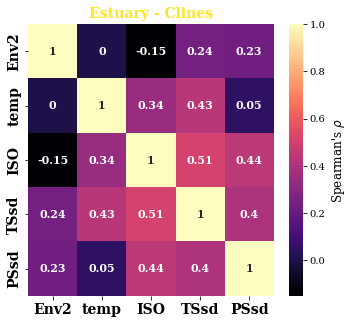

SS-Clines abs(max_val) = 0.51
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/11_env_correlations/figs/SS-Clines_heatmap.pdf


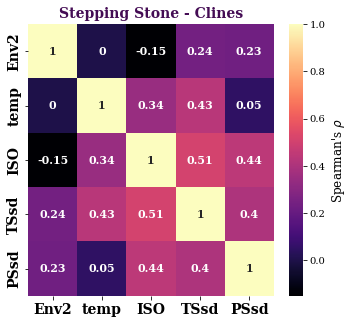

SS-Mtn abs(max_val) = 0.51
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/11_env_correlations/figs/SS-Mtn_heatmap.pdf


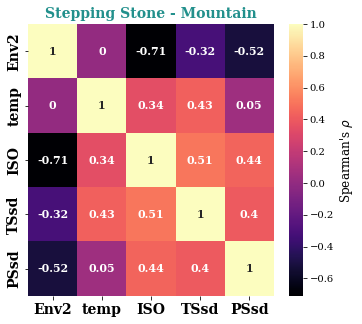

multivariate abs(max_val) = 0.72
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/11_env_correlations/figs/multivariate_heatmap.pdf


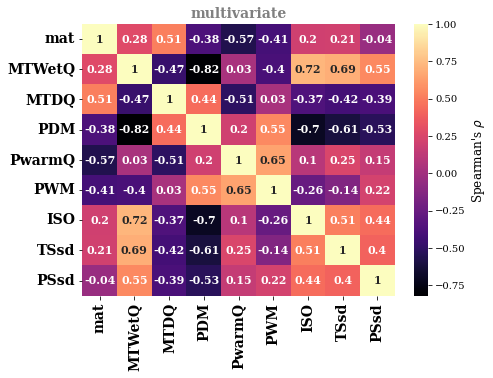

In [12]:
for landscape, df in envdata.items():
    # correlation matrix among variables
    corr_df = df.corr(method='spearman').round(2)

    # max value of lower triangle (excluding diagonal)
    max_val = corr_df.values[np.tril(np.ones(corr_df.shape), k=-1).astype(bool)].round(2).max()
#     max_val = np.tril(corr_df.abs(), k=-1).round(2).max()

    print(
        ColorText(f'{landscape} abs(max_val) = {max_val}').custom(
            mvp.boxplot_kwargs['palette'][landscape]
        ).bold()
    )

    # make a fig
    g = sns.heatmap(corr_df,
                    cmap='magma',
                    annot=True,
                    annot_kws={'weight': 'bold',
                               'fontsize' : 11},
                    cbar_kws={'label' : "Spearman's $\\rho$"})

    # edit the fig
    figsize = (5.5, 5) if landscape != 'multivariate' else (7, 5)
    g.figure.axes[-1].yaxis.label.set_size(12)
    g.figure.axes[0].set_xticklabels(g.figure.axes[0].get_xmajorticklabels(), fontsize = 14, weight='bold')
    g.figure.axes[0].set_yticklabels(g.figure.axes[0].get_ymajorticklabels(), fontsize = 14, weight='bold')
    g.figure.set_size_inches(figsize)
    g.set_title(mvp.factor_names[landscape], color=mvp.boxplot_kwargs['palette'][landscape], weight='bold', fontsize=14)

    # save
    save_pdf(f'{figdir}/{landscape}_heatmap.pdf')

    plt.show()

In [13]:
# collect correlation values from lower triangle (excluding diagonal)

# tri_vals = defaultdict(list)
val_df = pd.DataFrame(columns=['landscape', "rho"])
for landscape, df in envdata.items():
    # correlation matrix among variables
    corr_df = df.corr(method='spearman').round(2)
    
    # collect vals from lower triangle
    for i, col_i in enumerate(corr_df.columns):
        for j, col_j in enumerate(corr_df.columns):
            if i < j:
                val = corr_df.loc[col_i, col_j]
#                 tri_vals[landscape].append(val)
                val_df.loc[nrow(val_df), :] = landscape, val

# val_df['rho'] = val_df['rho'].astype(float)

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/11_env_correlations/figs/correlation_boxplot.pdf


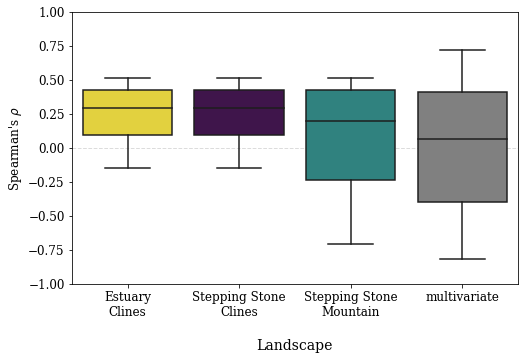

In [14]:
g = sns.boxplot(data=val_df,
                x='landscape',
                y="rho",
                palette=mvp.boxplot_kwargs['palette'])

mvp.update_ticklabels(g, replace=(' - ', '\n'))

g.set(ylim=(-1, 1))

g.figure.set_size_inches((8, 5))

g.figure.axes[0].set_xlabel('\nLandscape', fontsize=14)

g.figure.axes[0].set_ylabel("Spearman's $\\rho$", fontsize=12)

g.tick_params(labelsize=12)

g.axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)

save_pdf(f'{figdir}/correlation_boxplot.pdf')

plt.show()

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/11_env_correlations/figs/Est-Clines_scatter_matrix.pdf


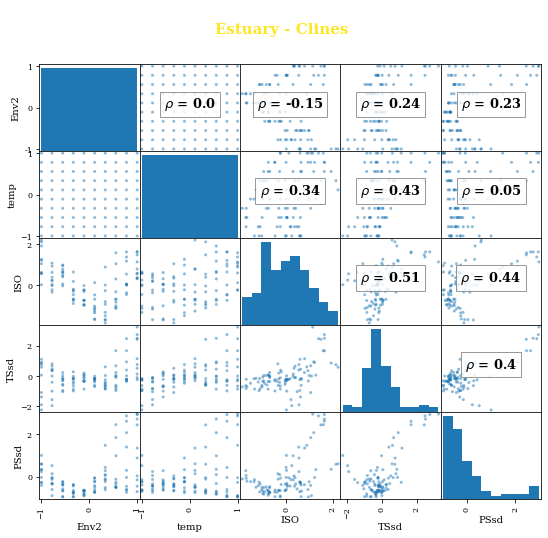

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/11_env_correlations/figs/SS-Clines_scatter_matrix.pdf


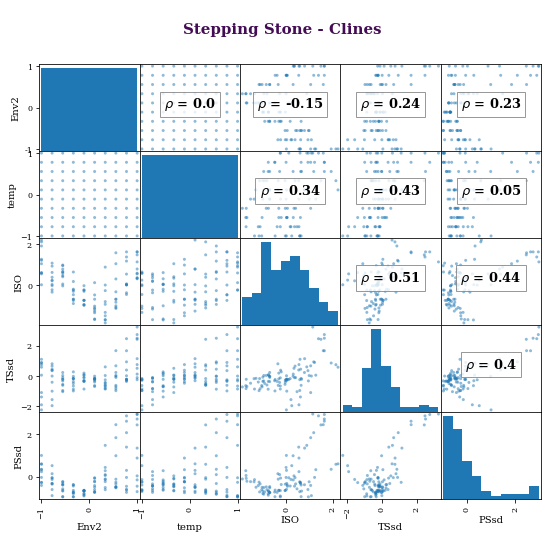

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/11_env_correlations/figs/SS-Mtn_scatter_matrix.pdf


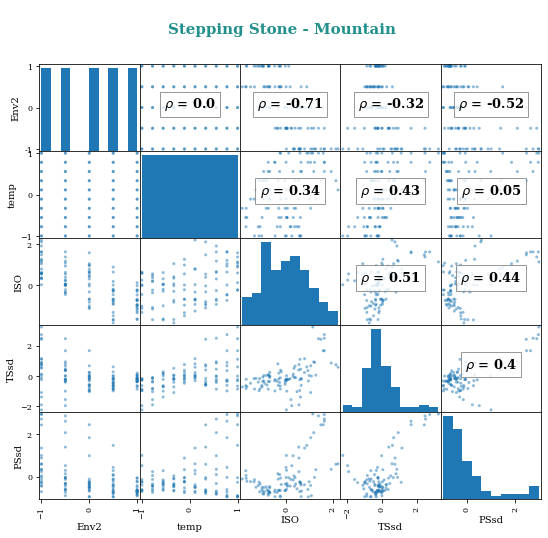

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/11_env_correlations/figs/multivariate_scatter_matrix.pdf


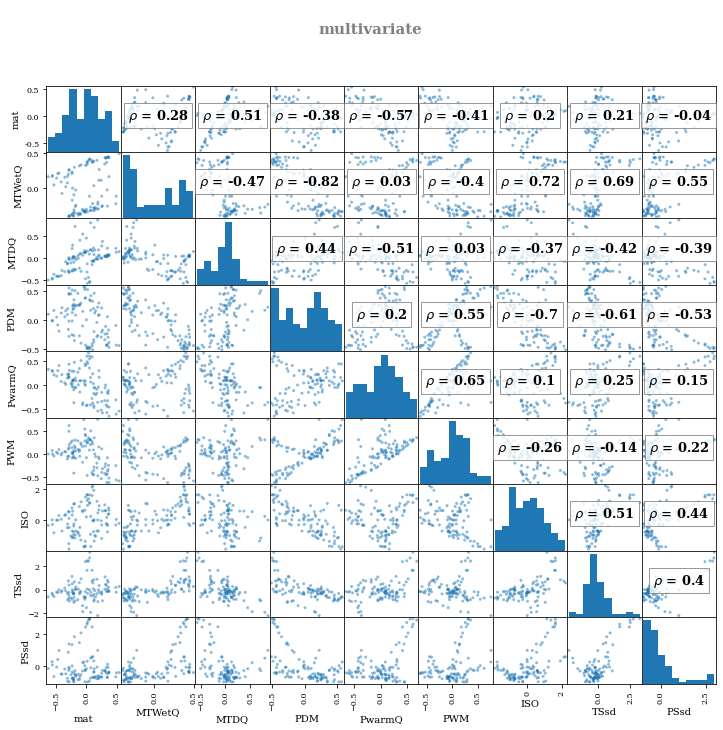

In [15]:
for landscape, df in envdata.items():
    if ncol(df) == 5:
        figsize = (9, 8)
        fontsize = 13
    else:
        figsize = (12, 11)
        fontsize = 13
    
    fig, fig_ax = plt.subplots(ncols=ncol(df), nrows=ncol(df), figsize=figsize)
    fig.figure.suptitle('\n%s' % mvp.factor_names[landscape],
                        fontsize=15,
                        weight='bold',
                        color=mvp.boxplot_kwargs['palette'][landscape])
    
    axes = pd.plotting.scatter_matrix(df, ax=fig_ax)
    
    for row, row_axes in enumerate(axes):
        for col, ax in enumerate(row_axes):
            if row < col:
                ymin, ymax = ax.get_ylim()
                xmin, xmax = ax.get_xlim()

                y = ymin + ((ymax - ymin) / 2)
                x = xmin + ((xmax - xmin) / 2)
                
                row_label = df.columns.tolist()[row]
                col_label = df.columns.tolist()[col]
                
                corr = round(
                    df[row_label].corr(df[col_label], method='spearman'),
                    2
                )                    

                t = ax.text(x, y, s=f'$\\rho$ = {corr}', ha='center', size=fontsize, weight='bold')
                t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='gray'))
    
    save_pdf(f'{figdir}/{landscape}_scatter_matrix.pdf')
    
    plt.show()